In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go # or plotly.express as px

import dash
import dash_core_components as dcc
import dash_html_components as html

from IPython.display import display
pd.options.display.max_columns = None

In [2]:
top_us = pd.read_csv(r'../output/2021.01.19 spotify_us_all_fe.csv',
                    index_col=0)
top_us = top_us[top_us['No. of Artists'] >= 2]
top_us['Date'] = pd.to_datetime(top_us['Date'])

In [3]:
top_us['No. of Artists'].unique()

array([ 2,  3,  6,  5,  4,  8,  7, 22, 11, 10, 13])

In [4]:
# top_us

<Figure size 720x432 with 0 Axes>

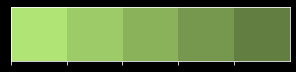

In [5]:
plt.style.use("dark_background")
# sns.set(rc={'figure.figsize':(10,6)})
plt.figure(figsize=(10,6))

custom_color = ['#b0e575', '#9dcb68', '#89b25b', '#76984e', '#627f41']
sns.set_palette(custom_color)
sns.palplot(sns.color_palette())

### Chart 2B - Genre metrics - Top 5 most successful genres

In [6]:
data1 = top_us.copy()

# Clean up genre
data1['Artist Genre'] = data1['Artist Genre'].str.replace("\[|\]|\'", "")
data1['Artist Genre'] = data1['Artist Genre'].str.replace(",\s", ",")
data1['Artist Genre'] = data1['Artist Genre'].str.split(",")

# Explode so that each genre is on a separate row
data1b = data1.explode('Artist Genre')

In [7]:
data1c = data1b.copy()
data1c = data1c[['Date', 'Track Name', 'Artist Name', 'Artist Genre', 
                 'Streams', 'Position', 'Profit']]\
.drop_duplicates()

In [8]:
data1d = data1c.groupby(['Artist Genre'])[['Streams', 'Position', 'Profit']]\
.agg('mean')\
.sort_values(by = 'Streams', ascending=False)\
.reset_index()\
.rename(columns={"Streams": "Avg Streams",
                "Position": "Avg Position",
                "Profit": "Avg Profit"})

In [9]:
data1e = data1c.groupby(['Artist Genre'])[['Position']]\
.agg('count')\
.sort_values(by = 'Position', ascending=False)\
.reset_index()\
.rename(columns={"Position": "Count"})

In [10]:
data1f = data1d.merge(data1e, how = 'inner', on = ['Artist Genre'])\
.sort_values(by = 'Count', ascending=False)
data1f

,Artist Genre,Avg Streams,Avg Position,Avg Profit,Count
71,rap,417179.068211,94.929447,1380.862716,135359
82,pop rap,407615.696337,96.028120,1349.207955,97582
97,trap,399475.247496,97.217646,1322.263069,95444
119,pop,391802.796167,96.872820,1296.867255,87459
90,hip hop,403872.383163,97.300543,1336.817588,72755
...,...,...,...,...,...
237,arkansas country,340873.000000,67.000000,1128.289630,1
433,glitch,258567.000000,165.000000,855.856770,1
432,abstract beats,258567.000000,165.000000,855.856770,1
246,collage pop,337143.000000,157.000000,1115.943330,1


Text(0.5, 1.0, 'Top 5 Genres with Highest Frequency on Chart')

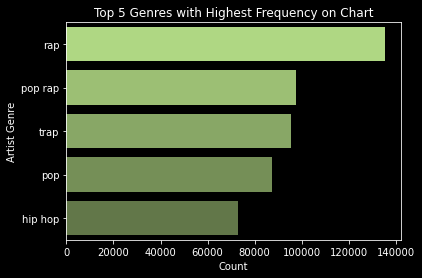

In [11]:
sns.barplot(data = data1f.iloc[0:5], 
            x = 'Count', y = 'Artist Genre')\
.set_title("Top 5 Genres with Highest Frequency on Chart")

Text(0.5, 1.0, 'Top 5 Genres with Highest Average Daily Profit')

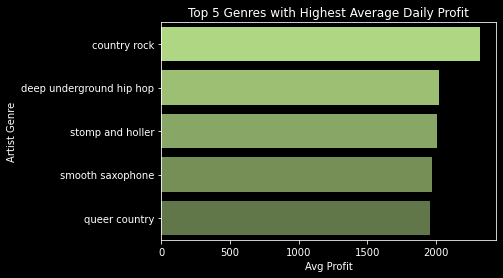

In [12]:
sns.barplot(data = data1f\
            .sort_values(by='Avg Profit', ascending=False)\
            .iloc[0:5], 
            x = 'Avg Profit', y = 'Artist Genre')\
.set_title("Top 5 Genres with Highest Average Daily Profit")

The top 5 most frequently appearing genres in the US Top 200 are rap, pop rap, trap, pop, and hip hop. 
However, when ranking by average daily streams or profits, the top 5 genres are country rock, deep underground hip hop, stomp and holler, smooth saxophone, and queer country. \
This is probably due to the fact that genres like rap and pop are incredibly common and can occur at any position in the chart (top or bottom), which would pull the average streams down. On the other hand, more esoteric genres are less likely to occur, and as such are less likely to have their average streams diluted. If a very popular song happens to be associated with this genre, then that song's popular record are less likely to be averaged out.

### Chart 3B - Top Artists in Top Genres

In [13]:
data1g = data1c.groupby(['Artist Genre', 'Artist Name'])[['Streams', 'Position', 'Profit']]\
.agg('mean')\
.sort_values(by = 'Streams', ascending=False)\
.reset_index()\
.rename(columns={"Streams": "Avg Streams",
                "Position": "Avg Position",
                "Profit": "Avg Profit"})

In [14]:
data1h = data1c.groupby(['Artist Genre', 'Artist Name'])[['Position']]\
.agg('count')\
.sort_values(by = 'Position', ascending=False)\
.reset_index()\
.rename(columns={"Position": "Count"})

In [15]:
data1i = data1g.merge(data1h, how = 'inner', on = ['Artist Genre', 'Artist Name'])\
.sort_values(by = 'Count', ascending=False)
# this will show all combinations of genres and artists

In [16]:
# only select the top 5 genres shown in data1f
data1j = data1i[data1i['Artist Genre'].isin(data1f['Artist Genre'].iloc[0:5])]\
.sort_values(by = ['Artist Genre', 'Avg Streams'], ascending=False) #change the second variable to sort by a different metric
data1j.groupby(['Artist Genre']).head(5)

,Artist Genre,Artist Name,Avg Streams,Avg Position,Avg Profit,Count
9,trap,Don Toliver,761405.008734,42.851528,2520.250579,229
29,trap,Clipse,624884.526316,77.736842,2068.367782,19
45,trap,BlocBoy JB,598617.360071,74.864528,1981.423462,561
66,trap,Young M.A,562795.733333,74.400000,1862.853877,15
74,trap,Swae Lee,561478.742452,66.937011,1858.494638,2683
8,rap,Don Toliver,761405.008734,42.851528,2520.250579,229
18,rap,THE SCOTTS,663480.736111,63.787037,2196.121237,216
23,rap,Clipse,624884.526316,77.736842,2068.367782,19
41,rap,Jack Harlow,610394.855596,53.000000,2020.406972,277
44,rap,BlocBoy JB,598617.360071,74.864528,1981.423462,561


### Chart 2A - Top Collabs (tabular, no chart)

In [17]:
data2 = top_us.copy()
data2 = data2[['Date', 'Track Name', 'Artist No.', 'Artist Name',
              'Streams', 'Position', 'Profit']].drop_duplicates()
data2['Artist No.'] = data2['Artist No.'].astype(str).apply(lambda x: x.zfill(2))

In [18]:
# Convert data2 to wide format so that all artists in each song as side by side
data2b = (data2.pivot_table(index=['Date', 'Track Name'], 
                      columns=['Artist No.'], 
                      values=['Artist Name'], 
                      aggfunc='first'))
data2b.columns = [''.join(col) for col in data2b.columns]
data2b = data2b.reset_index()

In [19]:
data2c = data2b.copy()

# Concatenate all artist names into one column, removing nans as needed
data2c['Artist_All'] = data2c["Artist Name01"].str\
.cat(data2c.iloc[:, 3:23].astype(str), sep=", ")

data2c['Artist_All'] = data2c['Artist_All'].str.replace('nan, |nan', '')

In [20]:
data2d = data2.merge(data2c[['Date', 'Track Name', 'Artist_All']],
                    how = 'left', on = ['Date', 'Track Name'])

data2d = data2d.drop(columns = ['Artist No.', 'Artist Name']).drop_duplicates()

In [21]:
data2e = data2d.groupby(['Artist_All'])[['Streams', 'Position', 'Profit']]\
.agg('mean')\
.sort_values(by = 'Streams', ascending=False)\
.reset_index()\
.rename(columns={"Streams": "Avg Streams",
                "Position": "Avg Position",
                "Profit": "Avg Profit"})

In [22]:
data2f = data2d.groupby(['Artist_All'])[['Position']]\
.agg('count')\
.sort_values(by = 'Position', ascending=False)\
.reset_index()\
.rename(columns={"Position": "Count"})

In [23]:
data2g = data2e.merge(data2f, how = 'left', on = ['Artist_All'])\
.sort_values(by=['Count'], ascending=False)

In [24]:
data2g

,Artist_All,Avg Streams,Avg Position,Avg Profit,Count
215,"Post Malone, Quavo,",455890.908233,88.076329,1508.998906,1166
530,"XXXTENTACION, Trippie Redd,",359463.470233,107.975841,1189.824086,1159
38,"Post Malone, 21 Savage,",611507.809565,73.001739,2024.090850,1150
414,"Billie Eilish, Khalid,",383749.324435,79.494867,1270.210264,974
118,"Lil Baby, Gunna,",504974.627615,80.482218,1671.466017,956
...,...,...,...,...,...
1802,"Shawn Mendes, teddy<3,",234322.000000,188.000000,775.605820,1
1202,"Jay Electronica, Travis Scott,",285938.000000,159.000000,946.454780,1
1799,"Louis The Child, MAX,",234429.000000,185.000000,775.959990,1
1797,"Miley Cyrus, Stevie Nicks,",234648.000000,181.000000,776.684880,1


### Chart 2C - Top Tracks over time

In [25]:
data3 = top_us.copy()
data3 = data3[['Date', 'Track Name', 'Track URI', 'Song_days_onchart',
               'Streams', 'Position', 'Profit']]\
.drop_duplicates()

In [26]:
# Grouping by Track Name, calculate the average streams/positions/profit, then rank in descending order
data3b = data3.groupby(['Track Name'])[['Streams', 'Position', 'Profit']]\
.agg('mean')\
.reset_index()\
.rename(columns={"Streams": "Avg Streams",
                "Position": "Avg Position",
                "Profit": "Avg Profit"})\
.sort_values(by = 'Avg Streams', ascending=False)

In [27]:
# Select only the top 5 songs from data3b
data3c = data3[data3['Track Name'].isin(data3b['Track Name'].iloc[0:5])].reset_index()

In [28]:
# data3c[data3c['Song_days_onchart']==max(data3c['Song_days_onchart'])]
# data3c[data3c['Track Name'] == "rockstar"].loc[:, ['Track URI']]

Text(0.5, 1.0, 'Top 5 Tracks over Time')

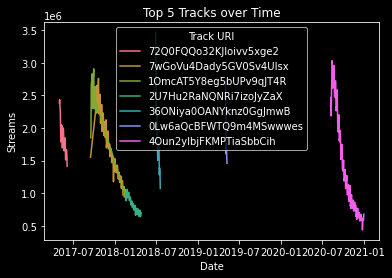

In [29]:
sns.lineplot(data = data3c, x = 'Date', y = 'Streams', 
             hue = 'Track URI', units="Track URI", estimator=None,
            legend=True)\
.set_title("Top 5 Tracks over Time")

Text(0.5, 1.0, 'Top 5 Tracks over Time')

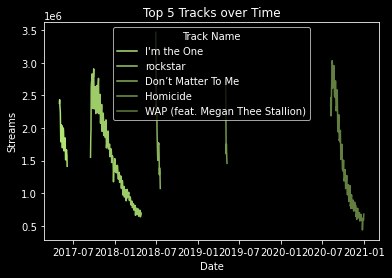

In [30]:
sns.lineplot(data = data3c, x = 'Date', y = 'Streams', 
             hue = 'Track Name', units="Track Name", estimator=None)\
.set_title("Top 5 Tracks over Time")
# plotting with Date as the x-axis means that each song's time horizon is squished horizontally

The above two charts show the evolution of the number of streams over a song's lifetime on the chart, shown for the top 5 most streamed songs in the entire dataset. All songs tend to exhibit the same pattern: reaching their peak in the first 2-3 days of being on the chart, and then steadily decreasing after that. \
Note that the song 'rockstar' is associated with multiple Track URIs throughout its lifetime, which may present some issues when creating chart legends. 

Text(0.5, 1.0, 'Top 5 Tracks over Time')

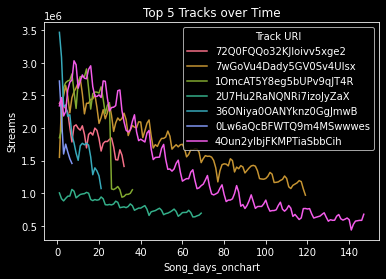

In [31]:
sns.lineplot(data = data3c, x = 'Song_days_onchart', y = 'Streams', 
             hue = 'Track URI', units="Track URI", estimator=None)\
.set_title("Top 5 Tracks over Time")

# plotting with Song_days_onchart allows all songs to start from the same point
# however, since rockstar has multiple Track URIs, 
# plotting using Song_days_onchart and Track Name will produce duplicate observations with Streams
# therefore, we need to specify Track URI as the hue, not Track Name

### Chart 4B - Artist Days on Chart metrics

In [32]:
data5 = top_us.copy()
data5b = data5[['Artist Name', 'Artist_days_onchart', 
               'Streams', 'Position', 'Profit']]\
.drop_duplicates()

In [33]:
data5c = data5b.groupby(['Artist_days_onchart'])[['Streams', 'Position', 'Profit']]\
.agg('mean')\
.reset_index()\
.rename(columns={"Streams": "Avg Streams",
                "Position": "Avg Position",
                "Profit": "Avg Profit"})

In [34]:
data5c

,Artist_days_onchart,Avg Streams,Avg Position,Avg Profit
0,1,372799.303571,118.432453,1233.965695
1,2,354290.626880,112.390038,1172.701975
2,3,335228.364919,111.009073,1109.605888
3,4,341662.062757,110.177984,1130.901428
4,5,341574.998925,110.293548,1130.613246
...,...,...,...,...
1450,1451,302010.363636,93.818182,999.654304
1451,1452,303997.923077,104.923077,1006.233125
1452,1453,299191.466667,113.866667,990.323755
1453,1454,301335.750000,112.125000,997.421332


Text(0.5, 1.0, 'Relationship between Artist Days on Chart and Average Streams')

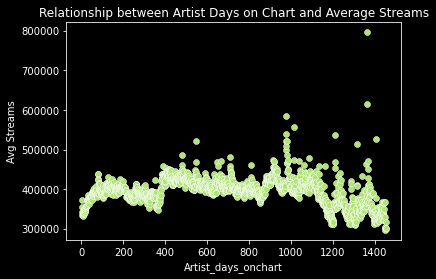

In [35]:
sns.scatterplot(data = data5c, x = 'Artist_days_onchart', y = 'Avg Streams')\
.set_title("Relationship between Artist Days on Chart and Average Streams")

This chart shows the average no. of streams, grouped by the no. of artist days on chart.
There does not seem to be any apparent relationship between the number of days an artist has been on the chart, and the average number of streams that artist's song garners. 